In [1]:
import pandas as pd
import numpy as np
import matplotlib.animation as anim
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style
%matplotlib inline
import csv
import math
from pandas import DataFrame

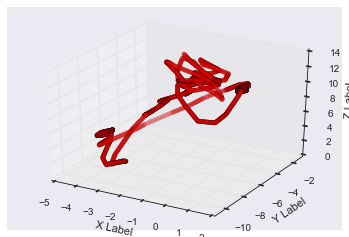

In [2]:
x1,y1,z1 = np.loadtxt('3M_1.csv', unpack = True, delimiter = ',')
x2,y2,z2 = np.loadtxt('3L_1.csv', unpack = True, delimiter = ',')

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

ax1.scatter(x2, y2, z2, c='r', marker='o')

ax1.set_xlabel('X Label')
ax1.set_ylabel('Y Label')
ax1.set_zlabel('Z Label')

plt.show()

In [3]:
distances = np.zeros((len(x2), len(x1)))

In [4]:
# distances

In [5]:
for i in range(len(x2)):
    for j in range(len(x1)):
        distances[i,j] = ((x1[j]-x2[i])**2 + (y1[j]-y2[i])**2 + (z1[j]-z2[i])**2)  

In [6]:
# distances

In [7]:
# np.sqrt(distances)

In [8]:
def distance_cost_plot(distances):
    im = plt.imshow(distances, interpolation='nearest', cmap='Reds') 
    plt.gca().invert_yaxis()
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid()
    plt.colorbar();

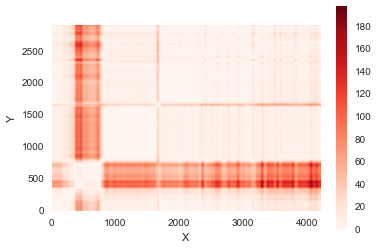

In [9]:
distance_cost_plot(distances)

In [10]:
accumulated_cost = np.zeros((len(x2), len(x1)))

In [11]:
# accumulated_cost

In [12]:
accumulated_cost[0,0] = distances[0,0]

In [13]:
# distance_cost_plot(accumulated_cost)

In [14]:
# accumulated_cost

In [15]:
for i in range(1, len(x1)):
    accumulated_cost[0,i] = distances[0,i] + accumulated_cost[0, i-1]    

In [16]:
# distance_cost_plot(accumulated_cost)

In [17]:
for i in range(1, len(x2)):
    accumulated_cost[i,0] = distances[i, 0] + accumulated_cost[i-1, 0]    

In [18]:
# distance_cost_plot(accumulated_cost)

In [19]:
# accumulated_cost

In [20]:
for i in range(1, len(x2)):
    for j in range(1, len(x1)):
        accumulated_cost[i, j] = min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]) + distances[i, j]

In [21]:
# accumulated_cost

In [22]:
# distance_cost_plot(accumulated_cost)

In [23]:
# accumulated_cost

In [24]:
path = [[len(x1)-1, len(x2)-1]]
i = len(x2)-1
j = len(x1)-1
while i>0 and j>0:
    if i==0:
        j = j - 1
    elif j==0:
        i = i - 1
    else:
        if accumulated_cost[i-1, j] == min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]):
            i = i - 1
        elif accumulated_cost[i, j-1] == min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]):
            j = j-1
        else:
            i = i - 1
            j= j- 1
    path.append([j, i])
path.append([0,0])

In [25]:
# accumulated_cost

In [26]:
# path

In [27]:
path_x = [point[0] for point in path]
path_y = [point[1] for point in path]

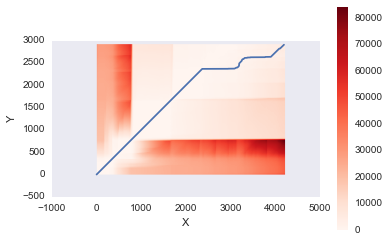

In [28]:
distance_cost_plot(accumulated_cost)
plt.plot(path_x, path_y);

In [29]:
def path_cost(x1, x2, accumulated_cost, distances):
    path = [[len(x1)-1, len(x2)-1]]
    cost = 0
    i = len(x2)-1
    j = len(x1)-1
    while i>0 and j>0:
        if i==0:
            j = j - 1
        elif j==0:
            i = i - 1
        else:
            if accumulated_cost[i-1, j] == min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]):
                i = i - 1
            elif accumulated_cost[i, j-1] == min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]):
                j = j-1
            else:
                i = i - 1
                j= j- 1
        path.append([j, i])
    path.append([0,0])
    for [x2, x1] in path:
        cost = cost +distances[x1, x2]
    return path, cost    

In [30]:
path, cost = path_cost(x1, x2, accumulated_cost, distances)
print (cost)

5139.33791167


In [31]:
# plt.plot(x1,y1, 'bo-' ,label='x1y1')
# plt.plot(x2,y2, 'g^-' ,label='x2y2')

# # plt.legend();

# paths = path_cost(x1,x2, accumulated_cost, distances)[0]
# for [map_x, map_y] in paths:
#     print (map_x, x2[map_x], ":", map_y, y2[map_y])
    
#     plt.plot([map_x, map_y], [x2[map_x], y2[map_y]], 'r')